# Data Cleaning - Part 1

Treatment of variable rounds['company_permalink'], companies['permalink'] and written to rounds_clean.csv and companies_clean.csv for downstream Data Cleaning - Part 2.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

%matplotlib inline

In [2]:
rounds = pd.read_csv('rounds2.csv',encoding='ISO-8859-1')

In [3]:
rounds.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.00
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.00
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00


In [4]:
companies = pd.read_csv('companies.txt',sep='\t',encoding='ISO-8859-1')

In [5]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [6]:
rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [7]:
rounds.shape

(114949, 6)

In [8]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [9]:
companies.shape

(66368, 10)

In [10]:
rounds.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [11]:
companies.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [12]:
len(companies.permalink.unique())

66368

In [13]:
companies['permalink'] = companies['permalink'].str.lower()

In [14]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [15]:
len(companies['permalink'].unique())

66368

In [16]:
len(rounds['company_permalink'].unique())

90247

In [17]:
rounds['company_permalink'] = rounds['company_permalink'].str.lower()

In [18]:
rounds.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.00
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.00
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00


In [19]:
len(rounds['company_permalink'].unique())

66370

In [20]:
rounds.loc[~rounds['company_permalink'].isin(companies['permalink']),:]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
29597,/organization/e-cãbica,/funding-round/8491f74869e4fe8ba9c378394f8fbdea,seed,NaN,01-02-2015,nan
31863,/organization/energystone-games-çµç³æ¸¸æ,/funding-round/b89553f3d2279c5683ae93f45a21cfe0,seed,NaN,09-08-2014,nan
45176,/organization/huizuche-com-æ ç§ÿè½¦,/funding-round/8f8a32dbeeb0f831a78702f83af78a36,seed,NaN,18-09-2014,nan
58473,/organization/magnet-tech-ç£ç³ç§æ,/funding-round/8fc91fbb32bc95e97f151dd0cb4166bf,seed,NaN,16-08-2014,1625585.00
101036,/organization/tipcat-interactive-æ²èÿä¿¡æ¯ç...,/funding-round/41005928a1439cb2d706a43cb661f60f,seed,NaN,06-09-2010,nan
109969,/organization/weiche-tech-åè½¦ç§æ,/funding-round/f74e457f838b81fa0b29649740f186d8,venture,A,06-09-2015,nan
113839,/organization/zengame-ç¦ æ¸¸ç§æ,/funding-round/6ba28fb4f3eadf5a9c6c81bc5dde6cdf,seed,NaN,17-07-2010,nan


In [21]:
rounds_original = pd.read_csv('rounds2.csv',encoding='ISO-8859-1')
rounds_original.iloc[[29597,31863,45176,58473]]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
29597,/ORGANIZATION/E-CÃBICA,/funding-round/8491f74869e4fe8ba9c378394f8fbdea,seed,NaN,01-02-2015,nan
31863,/ORGANIZATION/ENERGYSTONE-GAMES-ÇµÇ³Æ¸¸Æ,/funding-round/b89553f3d2279c5683ae93f45a21cfe0,seed,NaN,09-08-2014,nan
45176,/organization/huizuche-com-æ ç§ÿè½¦,/funding-round/8f8a32dbeeb0f831a78702f83af78a36,seed,NaN,18-09-2014,nan
58473,/ORGANIZATION/MAGNET-TECH-Ç£Ç³Ç§Æ,/funding-round/8fc91fbb32bc95e97f151dd0cb4166bf,seed,NaN,16-08-2014,1625585.00


In [22]:
rounds['company_permalink'] = rounds['company_permalink'].str.encode('utf-8').str.decode('ascii','ignore')
rounds.loc[~rounds['company_permalink'].isin(companies['permalink']),:]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
77,/organization/10north,/funding-round/b41ff7de932f8b6e5bbeed3966c0ed6a,equity_crowdfunding,NaN,12-08-2014,nan
729,/organization/51wofang-,/funding-round/346b9180d276a74e0fbb2825e66c6f5b,venture,A,06-07-2015,5000000.00
2670,/organization/adslinked,/funding-round/449ae54bb63c768c232955ca6911dee4,seed,NaN,29-09-2014,100000.00
3166,/organization/aesthetic-everything-social-network,/funding-round/62593455f1a69857ed05d5734cc04132,equity_crowdfunding,NaN,12-10-2014,nan
3291,/organization/affluent-attach-club-2,/funding-round/626678bdf1654bc4df9b1b34647a4df1,seed,NaN,15-10-2014,100000.00
4568,/organization/allgu-outlet,/funding-round/49e8a9b54ed19c8505ca92dc031a8e9c,venture,NaN,17-03-2015,1400000.00
8097,/organization/asiansbook,/funding-round/3f243ab92b4fe397d41b4734a17ca5f0,seed,NaN,15-09-2014,100000.00
8652,/organization/atlye-gri,/funding-round/75bdeacd95a647108aa4bc480e77894d,grant,NaN,01-11-2012,13940.00
9784,/organization/axgaz,/funding-round/511a41181aaf193bbd419babfb8d66e9,venture,NaN,06-07-2015,4094392.00
14311,/organization/boral-bikes-incorporated,/funding-round/be79575bf4b5b5d6fa64670800a3ca5e,seed,NaN,26-02-2015,nan


In [23]:
len(rounds['company_permalink'].unique())

66368

In [24]:
len(companies['permalink'].unique())

66368

In [25]:
companies.loc[~companies['permalink'].isin(rounds['company_permalink']),:]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
43,/organization/10â°north,10Â°North,NaN,Fashion,operating,CAN,ON,Toronto,Mississauga,05-01-2013
426,/organization/51wofang-æ å¿§ææ¿,51wofang æ å¿§ææ¿,http://www.51wofang.com,NaN,closed,NaN,NaN,NaN,NaN,01-01-2014
1506,/organization/adslinkedâ¢,AdsLinkedâ¢,http://www.adslinked.com,Advertising|Internet,operating,NaN,NaN,NaN,NaN,NaN
1775,/organization/aesthetic-everythingâ®-social-ne...,Aesthetic EverythingÂ® Social Network,http://aestheticeverything.com/,Public Relations,operating,USA,CA,Los Angeles,Marina Del Rey,15-06-2009
1834,/organization/affluent-attachã©-club-2,Affluent AttachÃ© Club,http://www.affluentattache.com/,Hospitality,operating,USA,CA,Los Angeles,Beverly Hills,NaN
2556,/organization/allgã¤u-outlet,AllgÃ¤u Outlet,http://allgaeuoutlet.de/,Fashion,operating,DEU,2,DEU - Other,Sonthofen,NaN
4567,/organization/asiansbookâ¢,Asiansbookâ¢,http://www.asiansbook.com,Social Media|Social Network Media,operating,NaN,NaN,NaN,NaN,NaN
4903,/organization/atã¶lye-gri,AtÃ¶lye Gri,http://www.atolyegri.com/,Advertising,operating,NaN,NaN,NaN,NaN,NaN
5490,/organization/axã¨gaz,AxÃ¨gaz,http://www.axegaz.com/,Energy,operating,FRA,A8,Paris,Levallois-perret,01-01-2012
8131,/organization/borã©al-bikes-incorporated,BorÃ©al Bikes Incorporated,http://www.borealbikes.com,Automotive|Design|Manufacturing,operating,DEU,16,Berlin,Berlin,01-01-2014


In [26]:
companies['permalink'] = companies['permalink'].str.encode('utf-8').str.decode('ascii','ignore')

In [27]:
companies.loc[~companies['permalink'].isin(rounds['company_permalink']),:]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at


In [28]:
len(rounds['company_permalink'].value_counts())



66368

In [29]:
len(companies['permalink'].value_counts())

66368

In [30]:
rounds.to_csv('rounds_clean.csv',sep=',',index=False)

In [31]:
companies.to_csv('companies_clean.csv',sep=',',index=False)

# Data Cleaning - Part 2

Now that we've treated the encoding problems (caused by special characters), let's complete the data cleaning process by treating missing values. 

We'll read the clean csv files we created in the previous exercise.

In [32]:
rounds = pd.read_csv('rounds_clean.csv',encoding='ISO-8859-1')
companies = pd.read_csv('companies_clean.csv',encoding='ISO-8859-1')

In [33]:
# quickly verify that there are 66368 unique companies in both
# and that only the same 66368 are present in both files

# unqiue values
print(len(companies.permalink.unique()))
print(len(rounds.company_permalink.unique()))

# present in rounds but not in companies
print(len(rounds.loc[~rounds['company_permalink'].isin(companies['permalink']), :]))

66368
66368
0


## Missing Value Treatment

Let's now move to missing value treatment. 

Let's have a look at the number of missing values in both the dataframes.

In [34]:
companies.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [35]:
rounds.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [36]:
master = pd.merge(companies,rounds,how='inner',left_on='permalink',right_on='company_permalink')
master.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.00
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.00
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00


In [37]:
master.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'status',
       'country_code', 'state_code', 'region', 'city', 'founded_at',
       'company_permalink', 'funding_round_permalink', 'funding_round_type',
       'funding_round_code', 'funded_at', 'raised_amount_usd'],
      dtype='object')

In [38]:
master = master.drop('company_permalink',axis=1)

In [39]:
master.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'status',
       'country_code', 'state_code', 'region', 'city', 'founded_at',
       'funding_round_permalink', 'funding_round_type', 'funding_round_code',
       'funded_at', 'raised_amount_usd'],
      dtype='object')

In [40]:
master.isnull().sum()

permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [41]:
#missing value percentage
round(100*master.isnull().mean(),2)

permalink                  0.00
name                       0.00
homepage_url               5.34
category_list              2.97
status                     0.00
country_code               7.55
state_code                 9.52
region                     8.84
city                       8.84
founded_at                17.85
funding_round_permalink    0.00
funding_round_type         0.00
funding_round_code        72.91
funded_at                  0.00
raised_amount_usd         17.39
dtype: float64

Clearly, the column ```funding_round_code``` is useless (with about 73% missing values). Also, for the business objectives given, the columns ```homepage_url```, ```founded_at```, ```state_code```, ```region``` and ```city``` need not be used.

Thus, let's drop these columns.

In [42]:
master = master.drop(['funding_round_code','homepage_url','founded_at','state_code','region','city'],axis=1)
master.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,nan
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.00
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,operating,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.00
4,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.00


In [43]:
round(100*master.isnull().mean(),2)

permalink                  0.00
name                       0.00
category_list              2.97
status                     0.00
country_code               7.55
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd         17.39
dtype: float64

In [44]:
master['raised_amount_usd'].describe(percentiles=[0.1,.2,.3,.4,.5,.6,.7,.8,.9,.95,.99])

count         94959.00
mean       10426869.33
std       114821247.98
min               0.00
10%           60000.00
20%          200000.00
30%          500000.00
40%         1000000.00
50%         1680511.00
60%         3000000.00
70%         5000218.20
80%        10000000.00
90%        20000000.00
95%        33000000.00
99%       111115455.90
max     21271935000.00
Name: raised_amount_usd, dtype: float64

The mean is somewhere around USD 10 million, while the median is only about USD 1m. The min and max values are also miles apart. 

In general, since there is a huge spread in the funding amounts, it will be inappropriate to impute it with a metric such as median or mean. Also, since we have quite a large number of observations, it is wiser to just drop the rows. 

Let's thus remove the rows having NaNs in ```raised_amount_usd```.

In [45]:
master = master[~np.isnan(master['raised_amount_usd'])]
round(100*master.isnull().mean(),3)

permalink                 0.00
name                      0.00
category_list             1.10
status                    0.00
country_code              6.16
funding_round_permalink   0.00
funding_round_type        0.00
funded_at                 0.00
raised_amount_usd         0.00
dtype: float64

Let's now look at the column ```country_code```. To see the distribution of the values for categorical variables, it is best to convert them into type 'category'.

In [46]:
country_codes = master['country_code'].astype('category')

In [47]:
country_codes.value_counts()

USA    62049
GBR     5019
CAN     2616
CHN     1927
IND     1649
FRA     1451
ISR     1364
ESP     1074
DEU     1042
AUS      649
RUS      588
IRL      563
SWE      560
SGP      546
NLD      532
JPN      485
ITA      483
BRA      483
CHE      437
KOR      432
CHL      432
FIN      382
DNK      314
ARG      297
BEL      293
HKG      250
TUR      196
NOR      191
BGR      190
MEX      189
AUT      152
POL      146
NZL      129
EST      126
PRT      101
ARE       96
MYS       95
COL       94
CZE       75
PER       72
ZAF       71
IDN       66
PHL       60
TWN       60
THA       60
UKR       60
LVA       58
HUN       53
NGA       50
GRC       49
LUX       46
KEN       42
LTU       39
ROM       36
EGY       34
CYP       31
SVK       31
ISL       29
VNM       27
SVN       26
PAK       26
JOR       26
LBN       25
URY       21
VEN       20
SRB       19
BGD       15
UGA       15
CYM       15
TAN       13
GHA       12
SAU       12
ECU       11
HRV       10
PAN       10
MLT        8
BMU        8

In [48]:
100*(country_codes.value_counts()/len(country_codes))

USA   65.34
GBR    5.29
CAN    2.75
CHN    2.03
IND    1.74
FRA    1.53
ISR    1.44
ESP    1.13
DEU    1.10
AUS    0.68
RUS    0.62
IRL    0.59
SWE    0.59
SGP    0.57
NLD    0.56
JPN    0.51
ITA    0.51
BRA    0.51
CHE    0.46
KOR    0.45
CHL    0.45
FIN    0.40
DNK    0.33
ARG    0.31
BEL    0.31
HKG    0.26
TUR    0.21
NOR    0.20
BGR    0.20
MEX    0.20
AUT    0.16
POL    0.15
NZL    0.14
EST    0.13
PRT    0.11
ARE    0.10
MYS    0.10
COL    0.10
CZE    0.08
PER    0.08
ZAF    0.07
IDN    0.07
PHL    0.06
TWN    0.06
THA    0.06
UKR    0.06
LVA    0.06
HUN    0.06
NGA    0.05
GRC    0.05
LUX    0.05
KEN    0.04
LTU    0.04
ROM    0.04
EGY    0.04
CYP    0.03
SVK    0.03
ISL    0.03
VNM    0.03
SVN    0.03
PAK    0.03
JOR    0.03
LBN    0.03
URY    0.02
VEN    0.02
SRB    0.02
BGD    0.02
UGA    0.02
CYM    0.02
TAN    0.01
GHA    0.01
SAU    0.01
ECU    0.01
HRV    0.01
PAN    0.01
MLT    0.01
BMU    0.01
MUS    0.01
CRI    0.01
BLR    0.01
GIB    0.01
GTM    0.01
AZE    0.01
TTO 

By far, the most number of investments have happened in American countries. We can also see the fractions.

Now, we can either delete the rows having ```country_code``` missing (about 6% rows), or we can impute them by ```USA```. Since the number 6 is quite small, and we have a decent amount of data, it may be better to just remove the rows.

**Note that** ```np.isnan``` does not work with arrays of type 'object', it only works with native numpy type (float). Thus, you can use ```pd.isnull()``` instead.

In [49]:
master = master[~pd.isnull(master['country_code'])]

round(100*master.isnull().mean(),3)


permalink                 0.00
name                      0.00
category_list             0.65
status                    0.00
country_code              0.00
funding_round_permalink   0.00
funding_round_type        0.00
funded_at                 0.00
raised_amount_usd         0.00
dtype: float64

Note that the fraction of missing values in the remaining dataframe has also reduced now - only 0.65% in ```category_list```. Let's thus remove those as well.

**Note**
Optionally, you could have simply let the missing values in the dataset and continued the analysis. There is nothing wrong with that. But in this case, since we will use that column later for merging with the 'main_categories', removing the missing values will be quite convenient (and again - we have enough data).

In [50]:

master = master[~pd.isnull(master['category_list'])]
round(100*master.isnull().mean(),3)

permalink                 0.00
name                      0.00
category_list             0.00
status                    0.00
country_code              0.00
funding_round_permalink   0.00
funding_round_type        0.00
funded_at                 0.00
raised_amount_usd         0.00
dtype: float64

In [51]:
master.to_csv("master_df.csv", sep=',', index=False)

In [52]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88529 entries, 0 to 114947
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                88529 non-null  object 
 1   name                     88528 non-null  object 
 2   category_list            88529 non-null  object 
 3   status                   88529 non-null  object 
 4   country_code             88529 non-null  object 
 5   funding_round_permalink  88529 non-null  object 
 6   funding_round_type       88529 non-null  object 
 7   funded_at                88529 non-null  object 
 8   raised_amount_usd        88529 non-null  float64
dtypes: float64(1), object(8)
memory usage: 6.8+ MB


In [53]:
100*(len(master.index) / len(rounds.index))

77.01589400516751

# Part 3: Analysis


In this section, we'll conduct the three types of analyses - funding type, country analysis, and sector analysis.


## Funding Type Analysis

Let's compare the funding amounts across the funding types. Also, we need to impose the constraint that the investment amount should be between 5 and 15 million USD. We will choose the funding type such that the average investment amount falls in this range.

In [54]:
df = pd.read_csv('master_df.csv',encoding='ISO-8859-1')
df.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.00
2,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.00
3,/organization/01games-technology,01Games Technology,Games,operating,HKG,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,01-07-2014,41250.00
4,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,43360.00


In [55]:
df['funding_round_type'].unique()

array(['venture', 'seed', 'undisclosed', 'convertible_note',
       'private_equity', 'debt_financing', 'angel', 'grant',
       'equity_crowdfunding', 'post_ipo_equity', 'post_ipo_debt',
       'product_crowdfunding', 'secondary_market',
       'non_equity_assistance'], dtype=object)

In [56]:
df['funding_round_type'].value_counts()

venture                  47809
seed                     21095
debt_financing            6506
angel                     4400
grant                     1939
private_equity            1820
undisclosed               1345
convertible_note          1320
equity_crowdfunding       1128
post_ipo_equity            598
product_crowdfunding       330
post_ipo_debt              151
non_equity_assistance       60
secondary_market            28
Name: funding_round_type, dtype: int64

In [57]:
# we are looking for only four types of venturefunding, 'venture','seed','angel' and 'private_equity', remaing types are filtered out.

df = df[(df['funding_round_type'] == 'venture') | (df['funding_round_type'] == 'angel') | (df['funding_round_type'] == 'seed') | (df['funding_round_type'] == 'private_equity')]

In [58]:
df['funding_round_type'].value_counts()

venture           47809
seed              21095
angel              4400
private_equity     1820
Name: funding_round_type, dtype: int64

Now, we have to compute a **representative value of the funding amount** for each type of invesstment. We can either choose the mean or the median - let's have a look at the distribution of ```raised_amount_usd``` to get a sense of the distribution of data.

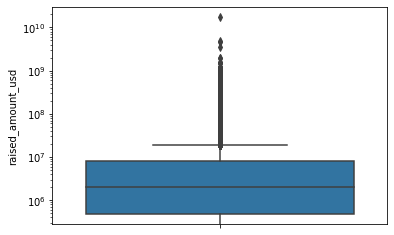

In [59]:
sns.boxplot(y = df['raised_amount_usd'])
plt.yscale('log')
plt.show()

In [60]:
df['raised_amount_usd'].describe()

count         75124.00
mean        9519475.01
std        77927781.97
min               0.00
25%          470585.25
50%         2000000.00
75%         8000000.00
max     17600000000.00
Name: raised_amount_usd, dtype: float64

Note that there's a significant difference between the mean and the median - USD 9.5m and USD 2m. Let's also compare the summary stats across the four categories.

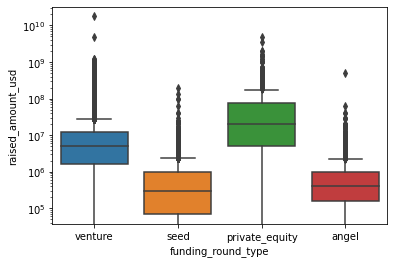

In [61]:
sns.boxplot(x = 'funding_round_type',y = 'raised_amount_usd',data=df)
plt.yscale('log')

In [62]:
df.pivot_table(values='raised_amount_usd',columns='funding_round_type',aggfunc=[np.median,np.mean])

median                                          mean  \
funding_round_type     angel private_equity      seed    venture     angel   
raised_amount_usd  414906.00    20000000.00 300000.00 5000000.00 971573.89   

                                                         
funding_round_type private_equity      seed     venture  
raised_amount_usd     73938486.28 747793.68 11724222.69

Note that there's a large difference between the mean and the median values for all four types. For type venture, for e.g. the median is about 20m while the mean is about 70m. 

Thus, the choice of the summary statistic will drastically affect the decision (of the investment type). Let's choose median, since there are quite a few extreme values pulling the mean up towards them - but they are not the most 'representative' values.


In [63]:
df.groupby('funding_round_type')['raised_amount_usd'].median().sort_values()

funding_round_type
seed               300000.00
angel              414906.00
venture           5000000.00
private_equity   20000000.00
Name: raised_amount_usd, dtype: float64

The median investment amount for type 'private_equity' is approx. USD 20m, which is beyond Teclov' range of 5-15m. The median of 'venture' type is about USD 5m, which is suitable for them. The average amounts of angel and seed types are lower than their range.

Thus, 'venture' type investment will be most suited to them.

## Country Analysis

Let's now compare the total investment amounts across countries. Note that we'll filter the data for only the 'venture' type investments and then compare the 'total investment' across countries.

In [64]:
#filter the df by the private equity type investments
df = df[df['funding_round_type'] == 'venture']

# group by country codes and compare the total funding amounts
country_wise_total = df.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)
print(country_wise_total)

country_code
USA   420068029342.00
CHN    39338918773.00
GBR    20072813004.00
IND    14261508718.00
CAN     9482217668.00
FRA     7226851352.00
ISR     6854350477.00
DEU     6306921981.00
JPN     3167647127.00
SWE     3145856571.00
NLD     2903875785.00
CHE     2801560264.00
SGP     2793917856.00
ESP     1827622434.00
BRA     1785817890.00
IRL     1669285543.00
RUS     1570426005.00
AUS     1319028698.00
DNK     1228310641.00
FIN     1043199709.00
BEL     1030839980.00
NOR      953636117.00
KOR      891988262.00
MYS      883058787.00
HKG      781266982.00
TWN      623979485.00
AUT      583360681.00
TUR      559097457.00
ITA      488289353.00
NZL      448316383.00
LUX      363100678.00
ARE      342617539.00
ARG      314338819.00
BMU      288800000.00
IDN      288492285.00
EGY      268225000.00
ZAF      233713106.00
MEX      190873643.00
NGA      183440000.00
CZE      178341562.00
PRT      137059950.00
POL      121502702.00
PHL      114499742.00
THA      106060000.00
COL      100126293.

Let's now extract the top 9 countries from ```country_wise_total```.

In [65]:
#top 9 countries 
top_9_countries = country_wise_total[:9]
top_9_countries

country_code
USA   420068029342.00
CHN    39338918773.00
GBR    20072813004.00
IND    14261508718.00
CAN     9482217668.00
FRA     7226851352.00
ISR     6854350477.00
DEU     6306921981.00
JPN     3167647127.00
Name: raised_amount_usd, dtype: float64

Among the top 9 countries, USA, GBR and IND are the top three English speaking countries. Let's filter the dataframe so it contains only the top 3 countries.

In [66]:
df = df[(df['country_code'] == 'USA') | (df['country_code'] == 'GBR') | (df['country_code'] == 'IND')]
df.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00
7,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.00
8,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.00
9,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.00
15,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.00


After filtering for 'venture' investments and the three countries USA, Great Britain and India, the filtered df looks like this.

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38803 entries, 0 to 88518
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                38803 non-null  object 
 1   name                     38803 non-null  object 
 2   category_list            38803 non-null  object 
 3   status                   38803 non-null  object 
 4   country_code             38803 non-null  object 
 5   funding_round_permalink  38803 non-null  object 
 6   funding_round_type       38803 non-null  object 
 7   funded_at                38803 non-null  object 
 8   raised_amount_usd        38803 non-null  float64
dtypes: float64(1), object(8)
memory usage: 3.0+ MB


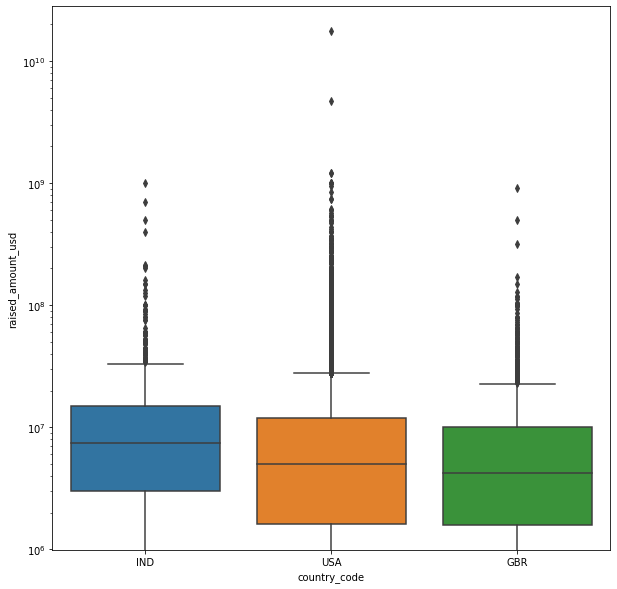

In [68]:
# boxplot to see distributions of funding amount across countries
plt.figure(figsize=(10, 10))
sns.boxplot(x='country_code', y='raised_amount_usd', data=df)
plt.yscale('log')
plt.show()

Now, we have shortlisted the investment type (venture) and the three countries. Let's now choose the sectors.

## Sector Analysis

First, we need to extract the main sector using the column ```category_list```. The category_list column contains values such as 'Biotechnology|Health Care' - in this, 'Biotechnology' is the 'main category' of the company, which we need to use.

Let's extract the main categories in a new column.

In [69]:
df.loc[:,'main_category'] = df['category_list'].apply(lambda x:x.split('|')[0])
df.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00,Media
7,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.00,Analytics
8,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.00,Analytics
9,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.00,Analytics
15,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.00,Apps


In [70]:
df = df.drop('category_list',axis=1)
df.head()

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category
0,/organization/-fame,#fame,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00,Media
7,/organization/0xdata,H2O.ai,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.00,Analytics
8,/organization/0xdata,H2O.ai,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.00,Analytics
9,/organization/0xdata,H2O.ai,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.00,Analytics
15,/organization/1-mainstream,1 Mainstream,acquired,USA,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.00,Apps


In [71]:
mapping = pd.read_csv('mapping.csv',sep=',')
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [72]:
mapping.isnull().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [73]:
mapping = mapping[~pd.isnull(mapping['category_list'])]
mapping.isnull().sum()

category_list                              0
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [74]:
mapping['category_list'] = mapping['category_list'].str.lower()
df['main_category'] = df['main_category'].str.lower()

In [75]:
print(mapping.head())

      category_list  Automotive & Sports  Blanks  Cleantech / Semiconductors  \
1                3d                    0       0                           0   
2       3d printing                    0       0                           0   
3     3d technology                    0       0                           0   
4        accounting                    0       0                           0   
5  active lifestyle                    0       0                           0   

   Entertainment  Health  Manufacturing  News, Search and Messaging  Others  \
1              0       0              1                           0       0   
2              0       0              1                           0       0   
3              0       0              1                           0       0   
4              0       0              0                           0       0   
5              0       1              0                           0       0   

   Social, Finance, Analytics, Advertising  

In [76]:
print(df.head())

                     permalink          name     status country_code  \
0          /organization/-fame         #fame  operating          IND   
7         /organization/0xdata        H2O.ai  operating          USA   
8         /organization/0xdata        H2O.ai  operating          USA   
9         /organization/0xdata        H2O.ai  operating          USA   
15  /organization/1-mainstream  1 Mainstream   acquired          USA   

                            funding_round_permalink funding_round_type  \
0   /funding-round/9a01d05418af9f794eebff7ace91f638            venture   
7   /funding-round/3bb2ee4a2d89251a10aaa735b1180e44            venture   
8   /funding-round/ae2a174c06517c2394aed45006322a7e            venture   
9   /funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e            venture   
15  /funding-round/b952cbaf401f310927430c97b68162ea            venture   

     funded_at  raised_amount_usd main_category  
0   05-01-2015        10000000.00         media  
7   09-11-2015        

In [77]:
mapping['category_list'].head(10)

1                        3d
2               3d printing
3             3d technology
4                accounting
5          active lifestyle
6              ad targeting
7        advanced materials
8          adventure travel
9               advertising
10    advertising exchanges
Name: category_list, dtype: object

In [78]:
df['main_category'].head(10)

0           media
7       analytics
8       analytics
9       analytics
15           apps
21      education
25    curated web
29    curated web
30    curated web
31    curated web
Name: main_category, dtype: object

To be able to merge all the ```main_category``` values with the mapping file's ```category_list``` column, all the values in the  ```main_category``` column should be present in the ```category_list``` column of the mapping file.

Let's see if this is true.

In [79]:
# values in the category_list column which are not in main_category column 
df[~df['main_category'].isin(mapping['category_list'])]

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category
7,/organization/0xdata,H2O.ai,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.00,analytics
8,/organization/0xdata,H2O.ai,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.00,analytics
9,/organization/0xdata,H2O.ai,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.00,analytics
47,/organization/100plus,100Plus,acquired,USA,/funding-round/b5facb0d9dea2f0352b5834892c88c53,venture,02-11-2011,500000.00,analytics
136,/organization/1world-online,1World Online,operating,USA,/funding-round/32936e588a134502712877150198a0b3,venture,13-08-2015,2500000.00,analytics
137,/organization/1world-online,1World Online,operating,USA,/funding-round/4e30bd5c85d8163239a3479ec979647a,venture,01-12-2013,500000.00,analytics
138,/organization/1world-online,1World Online,operating,USA,/funding-round/a349bfd7a8d48cfc8b9fdb79480dea7f,venture,02-07-2013,1000000.00,analytics
187,/organization/24-7-card,24/7 Card,closed,USA,/funding-round/0c38194ff2035185c96155dfad18f3bd,venture,21-12-2011,3452941.00,finance
590,/organization/6th-wave-innovations-corporation,6th Wave Innovations Corporation,operating,USA,/funding-round/75d128ac40f9e541a1a11786a47c2952,venture,08-07-2015,2569720.00,nanotechnology
597,/organization/7-billion-people,7 Billion People,closed,USA,/funding-round/58959ed2be7b14abd6beeb20c9eb17ca,venture,13-07-2012,2368902.00,analytics


Notice that values such as 'analytics', 'business analytics', 'finance', 'nanatechnology' etc. are not present in the mapping file.

Let's have a look at the values which are present in the mapping file but not in the main dataframe df.

In [80]:
# values in the category_list column which are not in main_category column 
mapping[~mapping['category_list'].isin(df['main_category'])]

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
16,air pollution control,0,0,1,0,0,0,0,0,0
20,alter0tive medicine,0,0,0,0,1,0,0,0,0
22,a0lytics,0,0,0,0,0,0,0,0,1
33,aquaculture,0,0,1,0,0,0,0,0,0
49,b2b express delivery,0,0,0,0,0,0,0,0,1
59,big data a0lytics,0,0,0,0,0,0,0,0,1
64,biomass power generation,0,0,1,0,0,0,0,0,0
69,boating industry,1,0,0,0,0,0,0,0,0
77,building owners,0,0,0,0,0,0,1,0,0
79,business a0lytics,0,0,0,0,0,0,0,0,1


If you see carefully, you'll notice something fishy - there are sectors named *alter0tive medicine*, *a0lytics*, *waste ma0gement*, *veteri0ry*, etc. This is not a *random* quality issue, but rather a pattern. In some strings, the 'na' has been replaced by '0'. This is weird - maybe someone was trying to replace the 'NA' values with '0', and ended up doing this. 

Let's treat this problem by replacing '0' with 'na' in the ```category_list``` column.

In [81]:
mapping['category_list'] = mapping['category_list'].apply(lambda x:x.replace('0','na'))
print(mapping['category_list'])

1                                         3d
2                                3d printing
3                              3d technology
4                                 accounting
5                           active lifestyle
6                               ad targeting
7                         advanced materials
8                           adventure travel
9                                advertising
10                     advertising exchanges
11                      advertising networks
12                     advertising platforms
13                                    advice
14                                 aerospace
15                               agriculture
16                     air pollution control
17                                algorithms
18                               all markets
19                              all students
20                      alternative medicine
21                                    alumni
22                                 analytics
23        

In [82]:
# merge the dfs
df = pd.merge(df, mapping, how='inner', left_on='main_category', right_on='category_list')
df.head()

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,/organization/-fame,#fame,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00,media,media,0,0,0,1,0,0,0,0,0
1,/organization/90min,90min,operating,GBR,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.00,media,media,0,0,0,1,0,0,0,0,0
2,/organization/90min,90min,operating,GBR,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.00,media,media,0,0,0,1,0,0,0,0,0
3,/organization/90min,90min,operating,GBR,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.00,media,media,0,0,0,1,0,0,0,0,0
4,/organization/all-def-digital,All Def Digital,operating,USA,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.00,media,media,0,0,0,1,0,0,0,0,0


In [83]:
df = df.drop('category_list',axis=1)
df.head()

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,/organization/-fame,#fame,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00,media,0,0,0,1,0,0,0,0,0
1,/organization/90min,90min,operating,GBR,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.00,media,0,0,0,1,0,0,0,0,0
2,/organization/90min,90min,operating,GBR,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.00,media,0,0,0,1,0,0,0,0,0
3,/organization/90min,90min,operating,GBR,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.00,media,0,0,0,1,0,0,0,0,0
4,/organization/all-def-digital,All Def Digital,operating,USA,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.00,media,0,0,0,1,0,0,0,0,0


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38788 entries, 0 to 38787
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   permalink                                38788 non-null  object 
 1   name                                     38788 non-null  object 
 2   status                                   38788 non-null  object 
 3   country_code                             38788 non-null  object 
 4   funding_round_permalink                  38788 non-null  object 
 5   funding_round_type                       38788 non-null  object 
 6   funded_at                                38788 non-null  object 
 7   raised_amount_usd                        38788 non-null  float64
 8   main_category                            38788 non-null  object 
 9   Automotive & Sports                      38788 non-null  int64  
 10  Blanks                                   38788

### Converting the 'wide' dataframe to 'long'

You'll notice that the columns representing the main category in the mapping file are originally in the 'wide' format - Automotive & Sports, Cleantech / Semiconductors etc.

They contain the value '1' if the company belongs to that category, else 0. This is quite redundant. We can as well have a column named 'sub-category' having these values. 

Let's convert the df into the long format from the current wide format. First, we'll store the 'value variables' (those which are to be melted) in an array. The rest will then be the 'index variables'.

In [85]:
help(pd.melt)

Help on function melt in module pandas.core.reshape.melt:

melt(frame:pandas.core.frame.DataFrame, id_vars=None, value_vars=None, var_name=None, value_name='value', col_level=None) -> pandas.core.frame.DataFrame
    Unpivot a DataFrame from wide to long format, optionally leaving identifiers set.
    
    This function is useful to massage a DataFrame into a format where one
    or more columns are identifier variables (`id_vars`), while all other
    columns, considered measured variables (`value_vars`), are "unpivoted" to
    the row axis, leaving just two non-identifier columns, 'variable' and
    'value'.
    
    Parameters
    ----------
    id_vars : tuple, list, or ndarray, optional
        Column(s) to use as identifier variables.
    value_vars : tuple, list, or ndarray, optional
        Column(s) to unpivot. If not specified, uses all columns that
        are not set as `id_vars`.
    var_name : scalar
        Name to use for the 'variable' column. If None it uses
        ``

In [86]:
# store the value and id variables in two separate arrays

# store the value variables in one Series
value_vars = df.columns[9:18]


# take the setdiff() to get the rest of the variables
id_vars = np.setdiff1d(df.columns, value_vars)

print(value_vars, "\n")
print(id_vars)

Index(['Automotive & Sports', 'Blanks', 'Cleantech / Semiconductors',
       'Entertainment', 'Health', 'Manufacturing',
       'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'],
      dtype='object') 

['country_code' 'funded_at' 'funding_round_permalink' 'funding_round_type'
 'main_category' 'name' 'permalink' 'raised_amount_usd' 'status']


In [87]:
# convert into long
long_df = pd.melt(df, 
        id_vars=list(id_vars), 
        value_vars=list(value_vars))

long_df.head()

,country_code,funded_at,funding_round_permalink,funding_round_type,main_category,name,permalink,raised_amount_usd,status,variable,value
0,IND,05-01-2015,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,media,#fame,/organization/-fame,10000000.00,operating,Automotive & Sports,0
1,GBR,06-10-2015,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,media,90min,/organization/90min,15000000.00,operating,Automotive & Sports,0
2,GBR,07-05-2013,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,media,90min,/organization/90min,5800000.00,operating,Automotive & Sports,0
3,GBR,26-03-2014,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,media,90min,/organization/90min,18000000.00,operating,Automotive & Sports,0
4,USA,06-08-2014,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,media,All Def Digital,/organization/all-def-digital,5000000.00,operating,Automotive & Sports,0


We can now get rid of the rows where the column 'value' is 0 and then remove that column altogether.

In [88]:
# remove rows having value=0
long_df = long_df[long_df['value']==1]
long_df = long_df.drop('value', axis=1)

In [89]:
# look at the new df
long_df.head()
len(long_df)

38788

In [90]:
# renaming the 'variable' column
long_df = long_df.rename(columns={'variable': 'sector'})

In [91]:
# info
long_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38788 entries, 25828 to 349075
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country_code             38788 non-null  object 
 1   funded_at                38788 non-null  object 
 2   funding_round_permalink  38788 non-null  object 
 3   funding_round_type       38788 non-null  object 
 4   main_category            38788 non-null  object 
 5   name                     38788 non-null  object 
 6   permalink                38788 non-null  object 
 7   raised_amount_usd        38788 non-null  float64
 8   status                   38788 non-null  object 
 9   sector                   38788 non-null  object 
dtypes: float64(1), object(9)
memory usage: 3.3+ MB


The dataframe now contains only venture type investments in countries USA, IND and GBR, and we have mapped each company to one of the eight main sectors (named 'sector' in the dataframe). 

We can now compute the sector-wise number and the amount of investment in the three countries.

In [92]:
# summarising the sector-wise number and sum of venture investments across three countries

# first, let's also filter for investment range between 5 and 15m
df = long_df[(long_df['raised_amount_usd'] >= 5000000) & (long_df['raised_amount_usd'] <= 15000000)]


In [93]:
# groupby country, sector and compute the count and sum
df.groupby(['country_code', 'sector']).raised_amount_usd.agg(['count', 'sum'])

count            sum
country_code sector                                                       
GBR          Automotive & Sports                         16   167051565.00
             Cleantech / Semiconductors                 130  1163990056.00
             Entertainment                               56   482784687.00
             Health                                      24   214537510.00
             Manufacturing                               42   361940335.00
             News, Search and Messaging                  73   615746235.00
             Others                                     147  1283624289.00
             Social, Finance, Analytics, Advertising    133  1089404014.00
IND          Automotive & Sports                         13   136900000.00
             Cleantech / Semiconductors                  20   165380000.00
             Entertainment                               33   280830000.00
             Health                                      19   167740000.00
             Manufacturing                               21   200900000.00
             News, Search and Messaging                  52   433834545.00
             Others                                     110  1013409507.00
             Social, Finance, Analytics, Advertising     60   550549550.00
USA          Automotive & Sports                        167  1454104361.00
             Cleantech / Semiconductors                2350 21633430822.00
             Entertainment                              591  5099197982.00
             Health                                     909  8211859357.00
             Manufacturing                              799  7258553378.00
             News, Search and Messaging                1583 13971567428.00
             Others                                    2950 26321007002.00
             Social, Finance, Analytics, Advertising   2714 23807376964.00

This will be much more easy to understand using a plot.

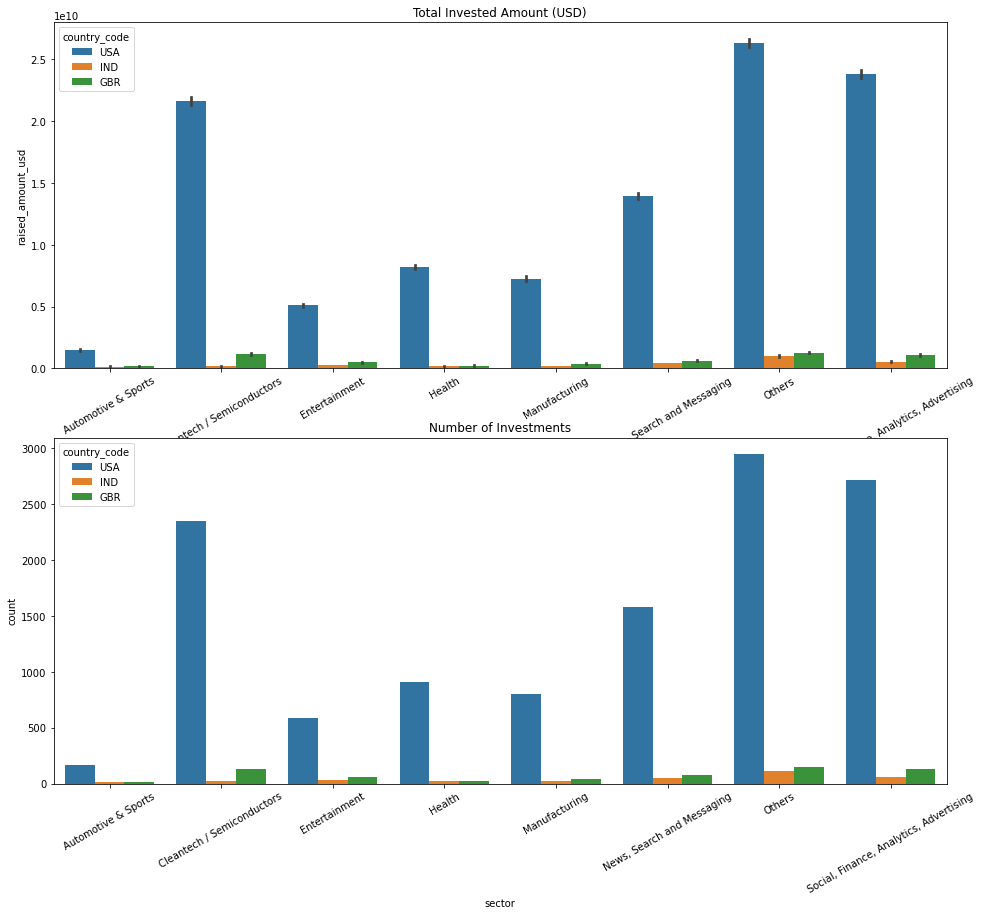

In [94]:
# plotting sector-wise count and sum of investments in the three countries
plt.figure(figsize=(16, 14))

plt.subplot(2, 1, 1)
p = sns.barplot(x='sector', y='raised_amount_usd', hue='country_code', data=df, estimator=np.sum)
p.set_xticklabels(p.get_xticklabels(),rotation=30)
plt.title('Total Invested Amount (USD)')

plt.subplot(2, 1, 2)
q = sns.countplot(x='sector', hue='country_code', data=df)
q.set_xticklabels(q.get_xticklabels(),rotation=30)
plt.title('Number of Investments')


plt.show()